In [1]:
#Inter-residue Contact Map
#python3 Plot-ContactMap.py <.pdb file> <.xtc file> contact-map.dat

In [10]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import copy as cp
import subprocess as sp
import os as os
import shutil as sh
import sys
import pandas as pd
import mdtraj as md
import matplotlib
#matplotlib.use("TkAgg")

In [18]:
ref_structure="C:/users/zhang/Work/Analysis/Traj/050/ALK2/Run2/ALKPep2_Run2_50_npt_eq.pdb"
traj         ="C:/users/zhang/Work/Analysis/Traj/050/ALK2/Run2/ALKPep2_Run2_50_protein_final.xtc"
inp          =r"C:\Users\zhang\Work\Analysis\Oligomerization\contact-map.dat"
Name         ="ALKPep2"
Name1        ="ALK2"

In [19]:
#structure parameters
topology   = md.load(ref_structure).topology
trajectory = md.load(traj, top=ref_structure)
frames     =trajectory.n_frames #Number of frames
chains     =topology.n_chains   #Number of chains
atoms      =int(topology.n_atoms/chains) #Number of atoms in each monomer 
AminoAcids =int(topology.n_residues/chains)#Number of residues per chain

In [20]:

#! more ALKPep4_protein_chainID.pdb

In [21]:
isum=1
atoms_list=[]
residue_list=[]

for residue in topology.chain(0).residues:
    atoms_list.append(residue.n_atoms)
    residue_list.append(residue)
    ', '.join(map(lambda x: "'" + x + "'", str(residue_list)))
#del residue_list[0]; del residue_list[-1] 


In [22]:
Norm_ContactMap = np.loadtxt(inp)

In [23]:
vmax=np.max(Norm_ContactMap)
vmin=np.min(Norm_ContactMap)

vmax
vmin

0.0

In [24]:
df=np.amax(Norm_ContactMap)
df

0.0028664305669508865

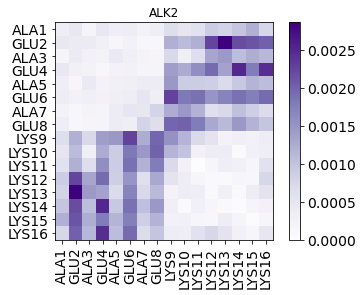

In [25]:
fig, ax = plt.subplots()

df=np.amax(Norm_ContactMap)
im=ax.imshow(Norm_ContactMap, vmin=vmin, vmax=vmax, cmap = 'Blues')
im.set_cmap('Purples')
plt.title(Name1)

ticks = range(AminoAcids)
plt.xticks(list(ticks), labels=residue_list,rotation='vertical', fontsize=14)
plt.yticks(list(ticks), labels=residue_list, fontsize=14)
#cbar=plt.colorbar(cmap='Blues', boundaries=np.arange(0.0, vmax+0.1, 0.1))
#cbar=plt.cm.ScalarMappable(cmap='Blues')
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14) 

plt.savefig(Name+'_Contact_map.png', dpi=400, bbox_inches='tight')
plt.show()